**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [544]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from scipy.optimize import minimize


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [545]:
# Define the symbols
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
v = sm.symbols('v')
w = sm.symbols('w')
tau = sm.symbols('tau')
L = sm.symbols('L')
G = sm.symbols('G')
C = sm.symbols('C')
w_tilde = sm.symbols('w_tilde')

# Define the utility function
utility = sm.log(C**alpha * G**(1-alpha)) - v*(L**2)/2

# Define the constraint
constraint = sm.Eq(C, kappa + w_tilde*L)

# Substitute the constraint into the utility function
complete = utility.subs(C, constraint.rhs)

# Differentiate the complete function w.r.t L
dU_dL = sm.diff(complete, L)
FOC = sm.Eq(0, dU_dL)

# Add L*v to both sides of FOC and then make the equation not divided in anything to read the polynomial formula
FOC_updated = sm.Eq(FOC.lhs + L*v, FOC.rhs + L*v)
FOC_updated = sm.Eq(FOC_updated.lhs * (L*w_tilde + kappa), FOC_updated.rhs * (L*w_tilde + kappa))
FOC_updated = sm.Eq(FOC_updated.lhs, FOC_updated.rhs - G**(1-alpha)*G**(alpha-1)*alpha*w_tilde + alpha * w_tilde)
FOC_updated = sm.Eq(FOC_updated.lhs - alpha * w_tilde, FOC_updated.rhs - alpha * w_tilde)

# Display the updated FOC equation
FOC_updated


Eq(L*v*(L*w_tilde + kappa) - alpha*w_tilde, 0)

We can from the above result see that it gives the following polynomial equation:

$L^2 \cdot w_{tilde} + L \cdot kappa - \frac{alpha}{v} \cdot w_{tilde} = 0$

We can therefore use the discriminant formula, which is:

$d = b^2 - 4\cdot a \cdot c$

We can read those from the above result and then find the solution down below.

In [546]:
# The following is read from the polynomial equation
a = w_tilde
b = kappa
c = alpha/v * w_tilde
d = b**2 - 4*a*c

L = (-b + sm.sqrt(d))/(2*a)
L

(-kappa + sqrt(-4*alpha*w_tilde**2/v + kappa**2))/(2*w_tilde)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In this question we will take the $L^{\star}(\tilde{w})$ that we found from the question above and insert the $\tilde{w} = (1-\tau)w$. We then plot the graph to see how the optimal labor supply depends on wage:

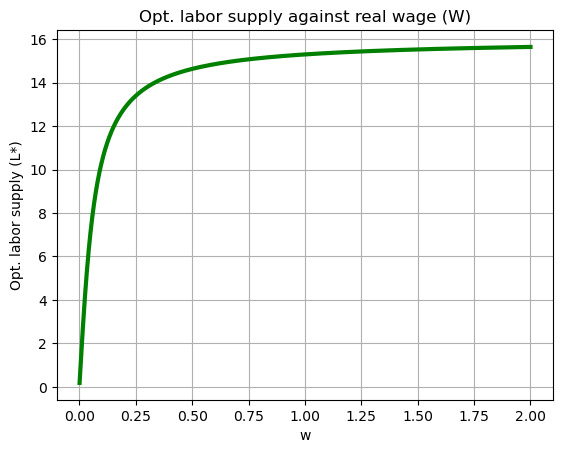

In [598]:
# We insert the parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30

w_val = np.linspace(0.001, 2.0, 1000)  # Range of w values to plot
tilde_w_val = (1 - tau) * w_val    # make w_tilde

# We insert the opt. labor supply function
opt_labor = (-kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w_val**2)) / (2 * tilde_w_val)

# We then plot the opt. labor supply function with the real wage values which is between 0 to 2
plt.plot(w_val, opt_labor, color='green', linewidth=3)
plt.xlabel('w')
plt.ylabel('Opt. labor supply (L*)')
plt.title('Opt. labor supply against real wage (W)')
plt.grid(True)
plt.show()


We can see that it is a logarithmic function where it goes towards 16 in optimal labor supply when w goes towards unlimited.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


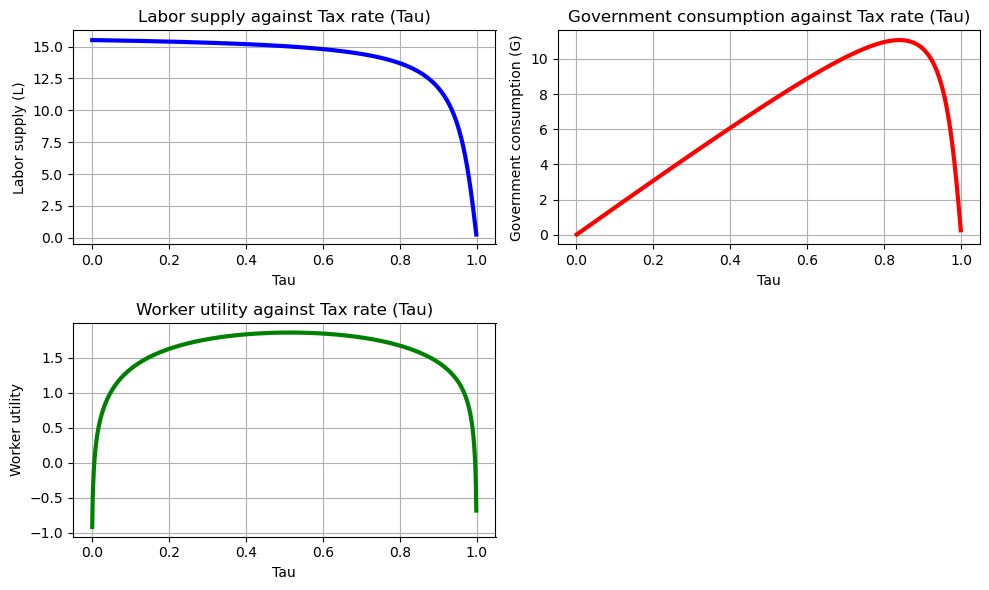

In [599]:
# Inserting the parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

# Creates the values that tau needs to be run through
tau_v = np.linspace(0.001, 0.999, 1000)  

# Make the empty arrays, so we can store the values for the plot inside these
lab_s = []
gov_c = []
work_u = []

# For loop where we go through all the tau values
for tau in tau_v:
    tilde_w = (1 - tau) * w

    # Finding the optimal labor value for the different tau values
    opt_labor = (-kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)) / (2 * tilde_w)
    
    # Calculating the government spending by the above optimal labor
    govern_spend = tau * w * opt_labor

    # Calculating the worker utility by the given parameter values and by the calculated government spending and labor supply
    utility = np.log((kappa + (1 - tau) * w * opt_labor)**alpha * govern_spend**(1 - alpha)) - (nu * opt_labor**2) / 2
    
    # Appending in the calculated labor value into the array lab_s
    lab_s.append(opt_labor)
    
    # Appending in the calculated government spending into the array gov_c
    gov_c.append(govern_spend)

    # Appending in the calculated worker utility into the array work_u
    work_u.append(utility)

# Plotting
plt.figure(figsize=(10, 6))

# Labor Supply plot
plt.subplot(2, 2, 1)
plt.plot(tau_v, lab_s, color='blue', linewidth=3)
plt.xlabel('Tau')
plt.ylabel('Labor supply (L)')
plt.title('Labor supply against Tax rate (Tau)')
plt.grid(True)

# Government Consumption plot
plt.subplot(2, 2, 2)
plt.plot(tau_v, gov_c, color='red', linewidth=3)
plt.xlabel('Tau')
plt.ylabel('Government consumption (G)')
plt.title('Government consumption against Tax rate (Tau)')
plt.grid(True)

# Worker Utility plot
plt.subplot(2, 2, 3)
plt.plot(tau_v, work_u, color='green', linewidth=3)
plt.xlabel('Tau')
plt.ylabel('Worker utility')
plt.title('Worker utility against Tax rate (Tau)')
plt.grid(True)

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

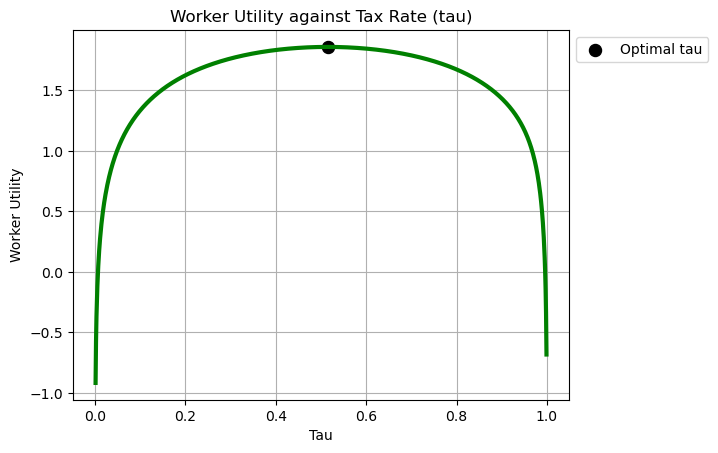

Optimal tax rate (tau): 0.51
Maximized worker utility: 1.86


In [549]:
# Setting the parameters values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

# Setting the values for tau
tau_v = np.linspace(0.001, 0.999, 1000)  

# Making an empty array, where we can store the for loop values in
worker_u = []

# finding the worker utility when running through the different tau_v between 0 and 1
for tau in tau_v:
    tilde_w = (1 - tau) * w
    
    # Finding the optimal value for labor supply
    opt_l = (-kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tilde_w**2)) / (2 * tilde_w)
    
    # Finding the optimal government spending when we have found the optimal labor supply
    govern_spend = tau * w * opt_l

    # When found the optimal labor and government spending it can be plugged into the utility function and hereby find the worker utility
    utility = np.log((kappa + (1 - tau) * w * opt_l)**alpha * govern_spend**(1 - alpha)) - (nu * opt_l**2) / 2

    # Appending the above calculated utility into the list
    worker_u.append(utility)

# Finding the socially optimal tax rate
optimal_tau_index = np.argmax(worker_u)
optimal_tau = tau_v[optimal_tau_index]
optimal_utility = worker_u[optimal_tau_index]

# Plotting the worker utility against tax rate, tau.
plt.plot(tau_v, worker_u, color='green', linewidth=3)
plt.scatter(optimal_tau, optimal_utility, color='black', label='Optimal tau', s=75)
plt.xlabel('Tau')
plt.ylabel('Worker Utility')
plt.title('Worker Utility against Tax Rate (tau)')
plt.legend(bbox_to_anchor = (1 , 1))
plt.grid(True)
plt.show()

# Printing the optimal tax rate and max. worker utility
print("Optimal tax rate (tau): {:.2f}".format(optimal_tau))
print("Maximized worker utility: {:.2f}".format(optimal_utility))


We then find that the optimal tax rate is $0.51$ and that gives the worker utility of $1.86$

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [550]:
import scipy.optimize as opt

def labor_sup(w, tau, G, sigma, rho, epsilon):
    # Defining the general preference formulation for the worker with the secondary condition
    def objec(L, w, tau, G, sigma, rho, epsilon):
        C = kappa + (1 - tau) * w * L
        value = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)/(1-rho) - nu * (L**(1+epsilon))/(1+epsilon)
        return -value  # Negative value for maximization
    
    # Maximizing to find the L star value, where the negative value of the objec function is taken and minimizing, which gives maximization
    L_star = opt.minimize_scalar(objec, bounds=(0, 24), args=(w, tau, G, sigma, rho, epsilon), method='bounded').x
    return L_star

# Using the function that is given for G that needs to be used
def find_G(tau, sigma, rho, epsilon):
    def equa(G, w, tau, sigma, rho, epsilon):
        return G - tau * w * labor_sup(w, tau, G, sigma, rho, epsilon)
    
    result = opt.root_scalar(equa, args=(w, tau, sigma, rho, epsilon), method='brentq', bracket=(0, 1000))
    G_sol = result.root
    return G_sol

# Setting the relevant parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = optimal_tau

# Given parameter values for set 1
sigma_s1 = 1.001
rho_s1 = 1.001
epsilon_s1 = 1.0

# Given parameter values for set 2
sigma_s2 = 1.5
rho_s2 = 1.5
epsilon_s2 = 1.0

# Calculate G for Set 1 and printing it after
G_solution_set1 = find_G(tau, sigma_s1, rho_s1, epsilon_s1)
print("Set 1: G =", G_solution_set1)

# Calculate G for Set 2 and printing it after
G_solution_set2 = find_G(tau, sigma_s2, rho_s2, epsilon_s2)
print("Set 2: G =", G_solution_set2)


Set 1: G = 7.710581392679844
Set 2: G = 4.974885272151633


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [606]:
import scipy.optimize as opt

def labor_sup(w, tau, G, sigma, rho, epsilon):
    # Defining the general preference formulation for the worker with the secondary condition
    def objec(L, w, tau, G, sigma, rho, epsilon):
        C = kappa + (1 - tau) * w * L
        value = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)/(1-rho) - nu * (L**(1+epsilon))/(1+epsilon)
        return -value  # Negative value for maximization
    
    # Maximizing to find the L star value, where the negative value of the objec function is taken and minimizing, which gives maximization
    L_star = opt.minimize_scalar(objec, bounds=(0, 24), args=(w, tau, G, sigma, rho, epsilon), method='bounded').x
    return L_star

# Function for finding tau star, which is done through finding the L star, because of the given equation for government spending
def tau_star(G, sigma, rho, epsilon):
    # The government spending equation
    def equa(tau, w, G, sigma, rho, epsilon):
        L_star = labor_sup(w, tau, G, sigma, rho, epsilon)
        return G - tau * w * L_star
    
    # A valid bracket for tau is between 0 and 1 because the tax rate cannot be lower than 0% and higher than 100%
    a = 0.0
    b = 1.0

    # This helps with finding the root within the bracket. The bracket will be expanded if the signs are the same
    while np.sign(equa(a, w, G, sigma, rho, epsilon)) == np.sign(equa(b, w, G, sigma, rho, epsilon)):
        b *= 2.0
    
    # We now solve for tau within the above bracket, which is between 0 and 1 or 0% and 100%
    result = opt.root_scalar(equa, args=(w, G, sigma, rho, epsilon), method='brentq', bracket=(a, b))
    tau_star = result.root
    return tau_star

# We insert the given parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

# Parameter set 1
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

# Parameter set 2
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# We find here the social optimal tax rate for the parameter set 1 and after print it
tau_star_set1 = tau_star(G_solution_set1, sigma_set1, rho_set1, epsilon_set1)
print("Set 1: Socially optimal tax rate (tau*):", tau_star_set1)

# We find here the social optimal tax rate for the parameter set 2 and after print it
tau_star_set2 = tau_star(G_solution_set2, sigma_set2, rho_set2, epsilon_set2)
print("Set 2: Socially optimal tax rate (tau*):", tau_star_set2)


Set 1: Socially optimal tax rate (tau*): 0.5144854372415884
Set 2: Socially optimal tax rate (tau*): 0.5144854854859953


/var/folders/1t/g6pbwy2d0xs212cq6dztdzn80000gn/T/ipykernel_39031/732758460.py:7: RuntimeWarning: invalid value encountered in double_scalars
  value = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)/(1-rho) - nu * (L**(1+epsilon))/(1+epsilon)


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [612]:
from scipy.optimize import minimize
import pandas as pd

# Constants and parameters
eta = 0.5
w = 1.0

# Define the profit function
def profit_func(x):
    ll_t, kappa = x
    return kappa * ll_t ** (1 - eta) - w * ll_t

# Define the negative of the profit function (to maximize instead of minimize)
def negative_profit_func(x):
    return -profit_func(x)

# Define the kappa values for the table
kappa_values = [0.5, 1.1, 1.5, 2, 2.5]

# Create an empty list to store the data
data = []

# Perform the optimization and populate the data list
for kappa in kappa_values:
    bounds = [(0, None), (kappa, kappa)]
    result = minimize(negative_profit_func, x0=(1, kappa), bounds=bounds)
    optimal_ll_t, optimal_kappa = result.x
    optimal_profit = -result.fun
    l_t = ((1 - eta) * optimal_kappa / w) ** (1 / eta)
    data.append({'Kappa': kappa, 'Optimal l_t': optimal_ll_t, 'Optimal profit': optimal_profit, 'L_t value for function': l_t})

# Create the table as a DataFrame
df = pd.DataFrame(data)
df = df.set_index('Kappa')
pd.options.display.float_format = '{:.6f}'.format

# Print the table
print(df)


          Optimal l_t  Optimal profit  L_t value for function
Kappa                                                        
0.500000     0.062501        0.062500                0.062500
1.100000     0.302500        0.302500                0.302500
1.500000     0.562500        0.562500                0.562500
2.000000     1.000000        1.000000                1.000000
2.500000     1.562496        1.562500                1.562500


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [553]:
# Setting the relevant parameter values
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 1000  # Number of shock series to simulate

np.random.seed(0)  # Set random seed for reproducibility

# Function to calculate salon value for a given shock series (sho_ser)
def cal_salon_val(sho_ser):
    kappa_t_prev = 1.0  # Initial demand shock
    lt_prev = 0.0  # Initial number of employees
    salon_val = 0.0  # Initial salon value

    # Making a for loop for the range of 0 to 120, which represents the 120 months or 10 years
    for t in range(120):
        # The AR(1) demand shock equation
        kappa_t = np.exp(rho * np.log(kappa_t_prev) + sho_ser[t])

        # The policy equation
        lt = ((1 - eta) * kappa_t / w) ** (1 / eta)

        # The profit function
        profit = kappa_t * lt ** (1 - eta) - w * lt - (lt != lt_prev) * iota
        discounted_profit = profit * R ** (-t)
        salon_val += discounted_profit

        kappa_t_prev = kappa_t  # Update for the next period
        lt_prev = lt  # Update for the next period

    return salon_val

salon_val = np.zeros(K)

for k in range(K):
    sho_ser = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)
    salon_val[k] = cal_salon_val(sho_ser)

H = np.mean(salon_val)
print("H with K equal", K, "=", H)

H with K equal 1000 = 27.81957901976801


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [554]:
import numpy as np

# Set the parameter values
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
delta = 0.05

# Number of shock series to simulate
K = 1000

# Initialize the objective function values list
objective_values = []

# Perform the simulation
for k in range(K):
    # Set the initial values
    kappa_t_minus_1 = 1.0
    ell_t_minus_1 = 0
    
    # Generate the demand shocks
    epsilon = np.random.normal(loc=-0.5 * sigma_epsilon ** 2, scale=sigma_epsilon, size=120)
    
    # Initialize the objective function value for the current shock series
    objective_value = 0.0
    
    # Iterate over time periods
    for t in range(120):
        # Calculate the demand shock for the current period
        kappa_t = np.exp(rho * np.log(kappa_t_minus_1) + epsilon[t])
        
        # Calculate the optimal employment level
        ell_t_ast = ((1 - eta) * kappa_t / w) ** (1 / eta)
        
        # Check if the employment level should be adjusted
        if abs(ell_t_minus_1 - ell_t_ast) > delta:
            ell_t = ell_t_ast
        else:
            ell_t = ell_t_minus_1
        
        # Calculate the profit for the current period
        profit = kappa_t * ell_t ** (1 - eta) - w * ell_t - int(ell_t != ell_t_minus_1) * iota
        
        # Discount the profit
        profit_discounted = R ** t * profit
        
        # Add the discounted profit to the objective function value
        objective_value += profit_discounted
        
        # Update the variables for the next period
        kappa_t_minus_1 = kappa_t
        ell_t_minus_1 = ell_t
    
    # Add the objective function value for the current shock series to the list
    objective_values.append(objective_value)

# Calculate H as the average of the objective function values
H = np.mean(objective_values)

print("H with delta =", delta, ": ", H)

H with delta = 0.05 :  31.228913289452198


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

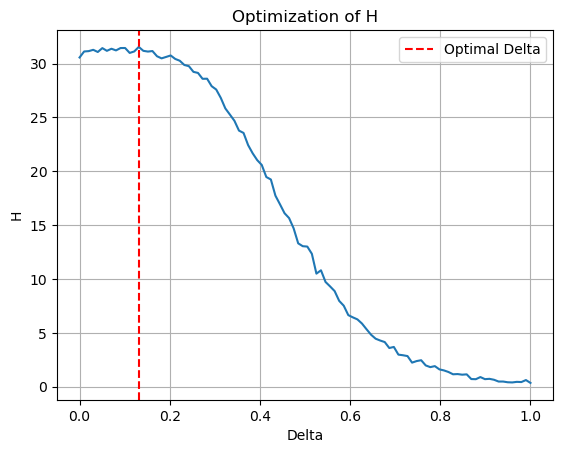

Optimal Delta: 0.13
Maximized H: 31.55


In [555]:
import numpy as np

# Set the parameter values
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

# Number of shock series to simulate
K = 1000

# Define the range of Delta values to consider
delta_val = np.linspace(0, 1, 100)

# Initialize the dictionary to store the results
results = {}

# Perform the search for the optimal Delta
for delta in delta_val:
    # Initialize the objective function values list
    objec_vals = []
    
    # Perform the simulation
    for k in range(K):
        # Set the initial values
        kappa_t_minus_1 = 1.0
        ell_t_minus_1 = 0
    
        # Generate the demand shocks
        epsilon = np.random.normal(loc=-0.5 * sigma_epsilon ** 2, scale=sigma_epsilon, size=120)
    
        # Initialize the objective function value for the current shock series
        objec_val = 0.0
    
        # Iterate over time periods
        for t in range(120):
            # Calculate the demand shock for the current period
            kappa_t = np.exp(rho * np.log(kappa_t_minus_1) + epsilon[t])
        
            # Calculate the optimal employment level
            ell_t_ast = ((1 - eta) * kappa_t / w) ** (1 / eta)
        
            # Check if the employment level should be adjusted
            if abs(ell_t_minus_1 - ell_t_ast) > delta:
                ell_t = ell_t_ast
            else:
                ell_t = ell_t_minus_1
        
            # Calculate the profit for the current period
            profit = kappa_t * ell_t ** (1 - eta) - w * ell_t - int(ell_t != ell_t_minus_1) * iota
        
            # Discount the profit
            profit_discounted = R ** t * profit
        
            # Add the discounted profit to the objective function value
            objec_val += profit_discounted
        
            # Update the variables for the next period
            kappa_t_minus_1 = kappa_t
            ell_t_minus_1 = ell_t
        objec_vals.append(objec_val)
    
        # Calculate H as the average of the objective function values
        H = np.mean(objec_vals)
    
    # Store the result
    results[delta] = H

# Find the optimal Delta that maximizes H
opt_delta = max(results, key=results.get)
max_H = results[opt_delta]

# Plot the results
plt.plot(delta_val, list(results.values()), linestyle='solid')
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('Optimization of H')
plt.axvline(x=opt_delta, color='r', linestyle='--', label='Optimal Delta')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Delta: {:.2f}".format(opt_delta))
print("Maximized H: {:.2f}".format(max_H))


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [556]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [557]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [558]:
def refined_global_optimizer(bounds, tolerance, lower_K, upper_K):
    x_best = None
    f_best = np.inf

    for k in range(upper_K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= lower_K:
            chi_k = 0.5 * (2 / (1 + np.exp((k - lower_K) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best
            x0 = x_k0
        else:
            x0 = x_k

        result = minimize(griewank, x0, method='BFGS', tol=tolerance)
        x_k_ast = result.x
        f_k_ast = result.fun

        if k == 0 or f_k_ast < f_best:
            x_best = x_k_ast
            f_best = f_k_ast

        if f_best < tolerance:
            break

    return x_best

# Settings
bounds = [-600, 600]
tolerance = 1e-8
lower_K = 10
upper_K = 1000

# Run the optimizer
x_ast = refined_global_optimizer(bounds, tolerance, lower_K, upper_K)

print("Optimization Result:")
print(f"x_ast = {x_ast}, f(x_ast) = {griewank(x_ast)}")

Optimization Result:
x_ast = [-1.23053982e-08 -8.41430316e-09], f(x_ast) = 1.1102230246251565e-16


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [559]:
def refined_global_optimizer(bounds, tolerance, lower_K, upper_K):
    x_best = None
    f_best = np.inf

    for k in range(upper_K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= lower_K:
            chi_k = 0.5 * (2 / (1 + np.exp((k - lower_K) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best
            x0 = x_k0
        else:
            x0 = x_k

        result = minimize(griewank, x0, method='BFGS', tol=tolerance)
        x_k_ast = result.x
        f_k_ast = result.fun

        if k == 0 or f_k_ast < f_best:
            x_best = x_k_ast
            f_best = f_k_ast

        if f_best < tolerance:
            break

    return x_best

# Settings
bounds = [-600, 600]
tolerance = 1e-8

# Run the optimizer with lower_K = 10
lower_K_10 = 10
upper_K = 1000
x_ast_lower_K_10 = refined_global_optimizer(bounds, tolerance, lower_K_10, upper_K)

# Run the optimizer with lower_K = 100
lower_K_100 = 100
x_ast_lower_K_100 = refined_global_optimizer(bounds, tolerance, lower_K_100, upper_K)

print("Optimization Result (lower_K = 10):")
print(f"x_ast = {x_ast}, f(x_ast) = {griewank(x_ast)}")

print("Optimization Result (lower_K = 100):")
print(f"x_ast = {x_ast_lower_K_100}, f(x_ast) = {griewank(x_ast_lower_K_100)}")


Optimization Result (lower_K = 10):
x_ast = [-1.23053982e-08 -8.41430316e-09], f(x_ast) = 1.1102230246251565e-16
Optimization Result (lower_K = 100):
x_ast = [-1.03171902e-08 -1.08121246e-08], f(x_ast) = 0.0


Both settings of lower_k have successfully found the global minimum of the Griewank function. This is found to be f(0,0)=0. We can here see that lower_k=100 gives the function value of zero, but where the lower_k=10 gives a global minimum close to zero, but not zero. By increasing the value of lower_k it has been seen that it gives a better precision in finding the global minimum.

Overall, the refined global optimizer with multi-start has successfully converged to the global minimum of the Griewank function, and increasing the value of lower_K to 100 has improved the precision slightly but did not significantly affect the final optimization outcome.